TODO: Add Title, TOC, Intro, Goal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f"pandas version: {pd.__version__}"

'pandas version: 2.1.4'

In [3]:
# Load the data
df = pd.read_csv("../data/raw/healthcare-dataset-stroke-data.csv", index_col='id')

In [4]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
32840,Female,52.0,0,0,Yes,Private,Urban,97.32,21.8,smokes,0
20376,Male,40.0,0,0,Yes,Self-employed,Urban,70.07,27.6,smokes,0
38678,Female,66.0,0,0,Yes,Self-employed,Rural,251.46,35.2,smokes,0
48652,Female,8.0,0,0,No,children,Urban,83.55,22.4,Unknown,0
61973,Female,80.0,1,1,Yes,Private,Rural,115.52,34.4,Unknown,0


TODO: Add data dictionary

In [5]:
df.shape

(5110, 11)

In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


Checking data types - Based on the values in the sample rows that we saw, the data types look correct and we do not need to fix any type at this point.  
Checking nulls -  We can see that `bmi` has some null values. We will investigate this further.

## Filling in null values for `bmi`

`bmi` has null values for 5110 - 4909 = 201 records, let's see how many of these rows have stroke = 1

In [8]:
sel = df['bmi'].isnull()
df.loc[sel, ['stroke']].value_counts()

stroke
0         161
1          40
Name: count, dtype: int64

In [9]:
def plotDistributionBar(df, columnName, top_n = 0):
    """
    This function will create a bar chart to show the distribution of the values in a column.

    Input Parameters:
    df:  DataFrame that contains the column.
    columnName: Column that we want to create the bar chart for.
    top_n: If you only want to plot the top n highest occuring elements.

    Output:
    Prints a bar chart that shows the distribution of the values of a column.

    Sample usage:
    plotDistributionBar(df_order_payments,'payment_type', 10)
    """
    percentages_all = round(df[columnName].value_counts(normalize=True)*100, 2)
    percentages = {}
    if top_n == 0:
        percentages = percentages_all
    else:
        if top_n < len(percentages_all) and top_n > 0:
            percentages = percentages_all[:top_n]

    plt.figure()
    if len(percentages_all) > 10:
        plt.figure(figsize=(15,5))
    graph = plt.bar(percentages.index, percentages.values)
    plt.title(f"Distribution of {columnName} in the dataset")
    plt.xticks(rotation=45)
    if len(percentages_all) > 10:
        plt.xticks(rotation=90)
    for p in graph:
        height=p.get_height()
        plt.annotate( "{}%".format(height),(p.get_x() + p.get_width()/2, height+.05),ha="center",va="bottom",fontsize=9)
    plt.show()

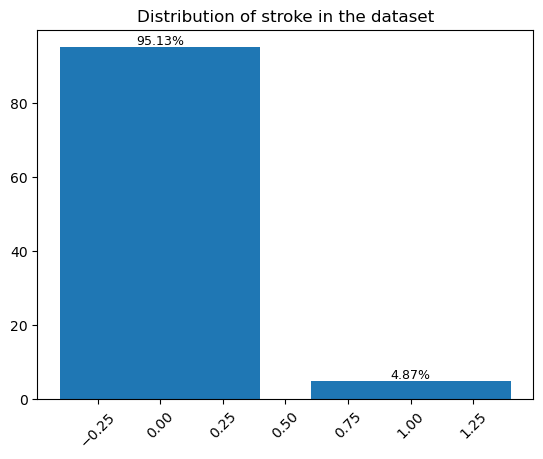

In [10]:
plotDistributionBar(df, 'stroke')

In [11]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

There are only 249 rows with stroke = 1, so dropping rows is not sensible in this case. Let's see distibution of BMI for stroke = 0 and stroke = 1

In [12]:
sel0 = (-df['bmi'].isna()) & (df['stroke'] == 0)
df_0 = df.loc[sel0]
print("For rows that have BMI as not null and Stroke = 0")
print(f"Mean = {df_0['bmi'].mean()}")
print(f"Median = {df_0['bmi'].median()}")

For rows that have BMI as not null and Stroke = 0
Mean = 28.823063829787237
Median = 28.0


1


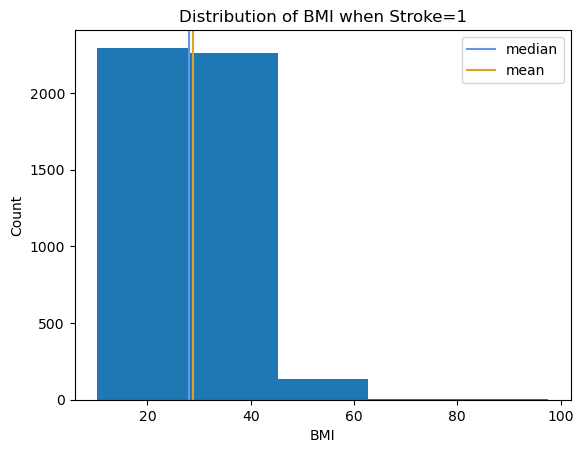

In [13]:
# Visualizing using a histogram

# Bin Width = (Max-Min)/sqrt(n)
hist_bin_size_df0 = round(((df_0['bmi'].max() - df_0['bmi'].min())) / (df_0.shape[0] ** 0.5))
print(hist_bin_size_df0)

plt.figure()
plt.hist(df_0['bmi'], bins=5)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI when Stroke=1')
plt.axvline(df_0['bmi'].median(), label='median', color='cornflowerblue')
plt.axvline(df_0['bmi'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

In [14]:
sel1 = (-df['bmi'].isna()) & (df['stroke'] == 1)
df_1 = df.loc[sel1]
print("For rows that have BMI as not null and Stroke = 1")
print(f"Mean = {df_1['bmi'].mean()}")
print(f"Median = {df_1['bmi'].median()}")

For rows that have BMI as not null and Stroke = 1
Mean = 30.471291866028707
Median = 29.7


In [15]:
df_1.shape[0]

209

3


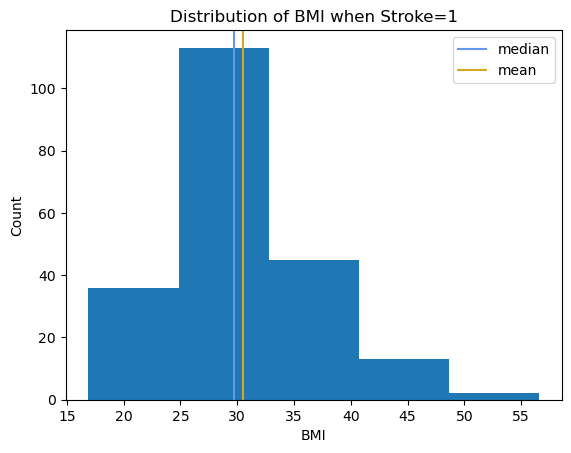

In [16]:
# Visualizing using a histogram

# Bin Width = (Max-Min)/sqrt(n)
hist_bin_size_df1 = round(((df_1['bmi'].max() - df_1['bmi'].min())) / (df_1.shape[0] ** 0.5))
print(hist_bin_size_df1)

plt.figure()
plt.hist(df_1['bmi'], bins=5)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI when Stroke=1')
plt.axvline(df_1['bmi'].median(), label='median', color='cornflowerblue')
plt.axvline(df_1['bmi'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

For our case we will put the mean value for the BMI for the 2 categories to fill in the missing values.

In [17]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- when stroke = 0, the BMI should be 28.8  
- when stroke = 1, the BMI should be 30.5

In [18]:
# filling in the null values based on whether stroke is 0 or 1
# https://stackoverflow.com/questions/65470708/best-way-to-fill-null-values-with-conditions-using-pandas
values = df['stroke'].eq(0).map({True: 28.8, False: 30.5})
df['bmi'] = df['bmi'].fillna(values)

In [19]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Confirmed that now there are no null values in the dataset

## check for duplicates

In [20]:
# check for duplicate rows
df.duplicated().sum()

0

In [21]:
# check for duplicate columns
df.T.duplicated().sum()

0

There are no duplicates.

Let's plot the distribution of variables and also see if there is any correlation.

c:\Users\anami\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


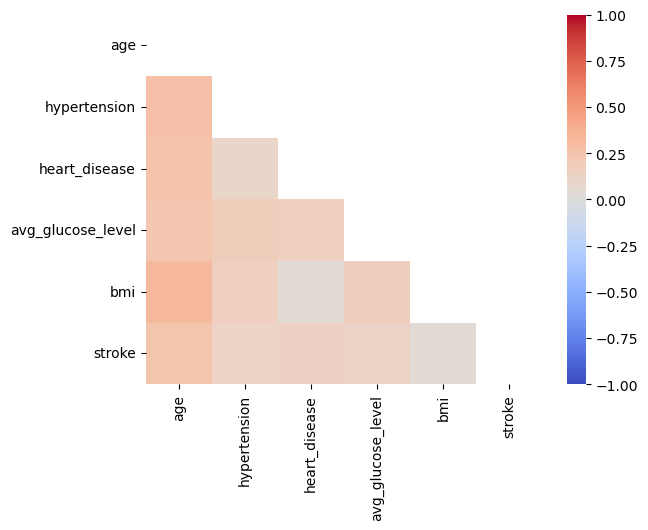

In [22]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure()
sns.heatmap(corr, mask=mask, center=0, annot=True, cmap="coolwarm", vmax=1.0, vmin=-1.0)
plt.show()

In [23]:
# see which columns are categorical vs numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.1+ KB


Categorical colums:
- `gender`
- `ever_married`
- `work_type`
- `smoking_status`
- `Residence_type`


Numerical columns:
- `age`
- `hypertension`
- `heart_disease`
- `avg_glucose_level`
- `bmi`
- `stroke`

In [24]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

We see there is 1 row with Gender = Other, we will drop this row so it is easier to convert this categorical column to numerical using binary encoding. If there were more rows with Other, then we would consider using dummy variables / one-hot encoding, but we do not need to do that in this case.

In [25]:
# drop the one row with gender = Other
indexOther = df[df['gender'] == 'Other'].index
print(indexOther)
df.drop(indexOther, inplace=True)

Index([56156], dtype='int64', name='id')


In [26]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [27]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [28]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [29]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [30]:
distinct_value_colums = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type', 'hypertension', 'heart_disease', 'stroke']
continuous_value_columns = ['age', 'avg_glucose_level' , 'bmi']

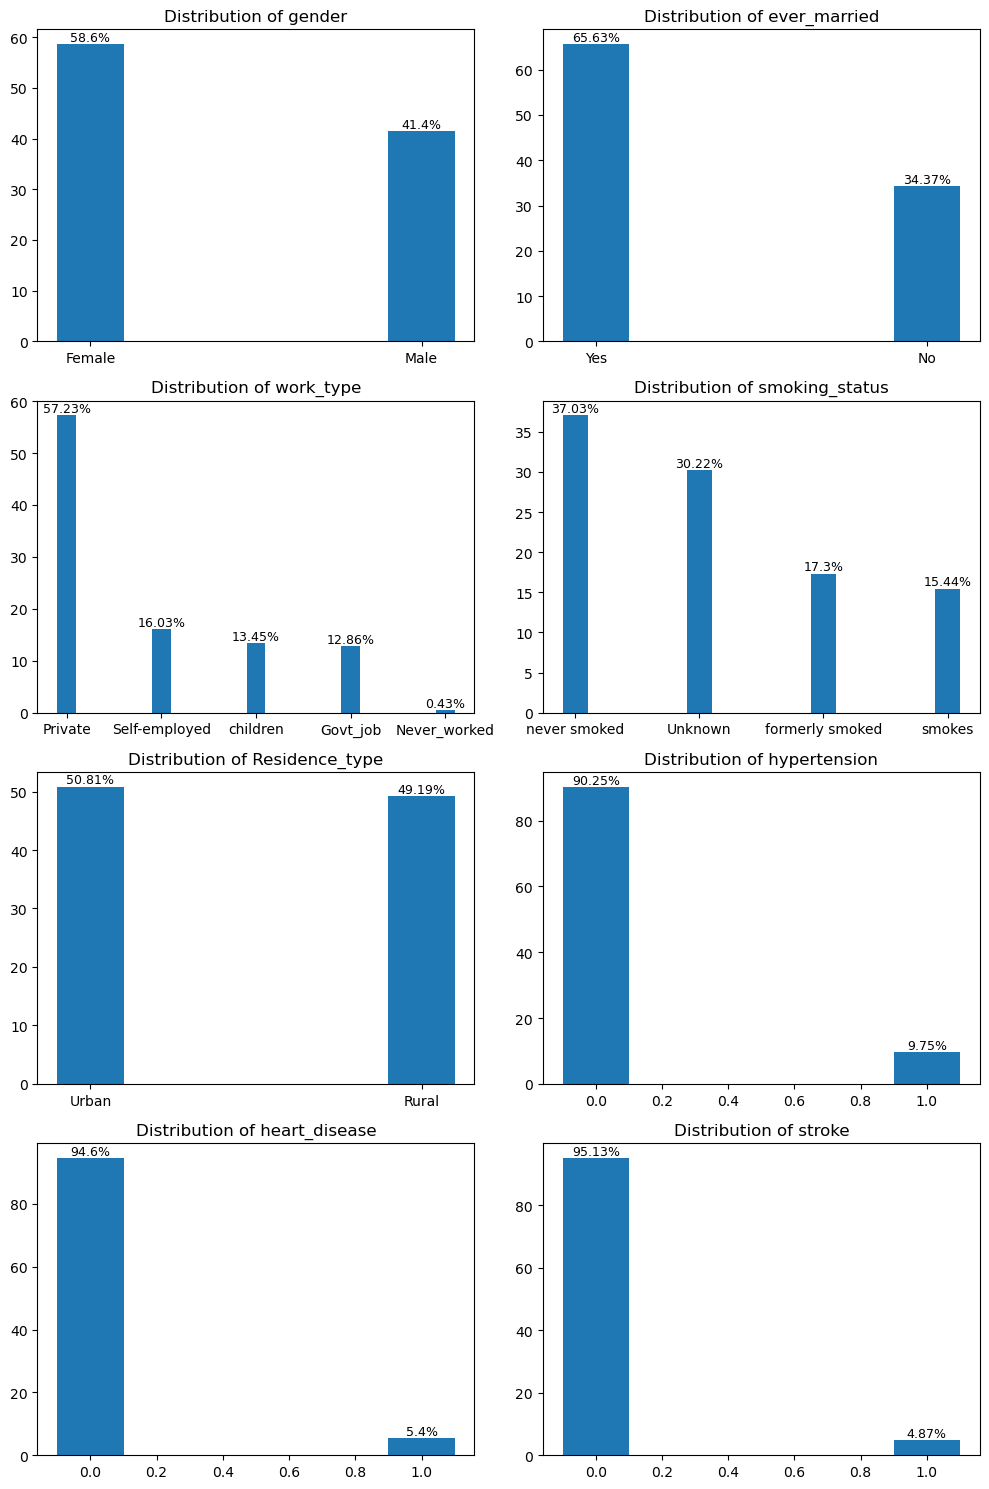

In [31]:
# set up subplots canvas
plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

for i, col in enumerate(distinct_value_colums):
    plt.subplot(4, 2, i+1)
    percentages = round(df[col].value_counts(normalize=True)*100, 2)
    graph = plt.bar(percentages.index, percentages.values, width=0.2)
    plt.title(f"Distribution of {col}")
    # plt.xticks(rotation=45)
    for p in graph:
        height=p.get_height()
        plt.annotate( "{}%".format(height),(p.get_x() + p.get_width()/2, height+.05),ha="center",va="bottom",fontsize=9)
plt.tight_layout()
plt.show()


We can convert all these categorical columns to numericals using one-hot encoding or dummy variables.

Let's plot the distribution of numerical columns also

c:\Users\anami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anami\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


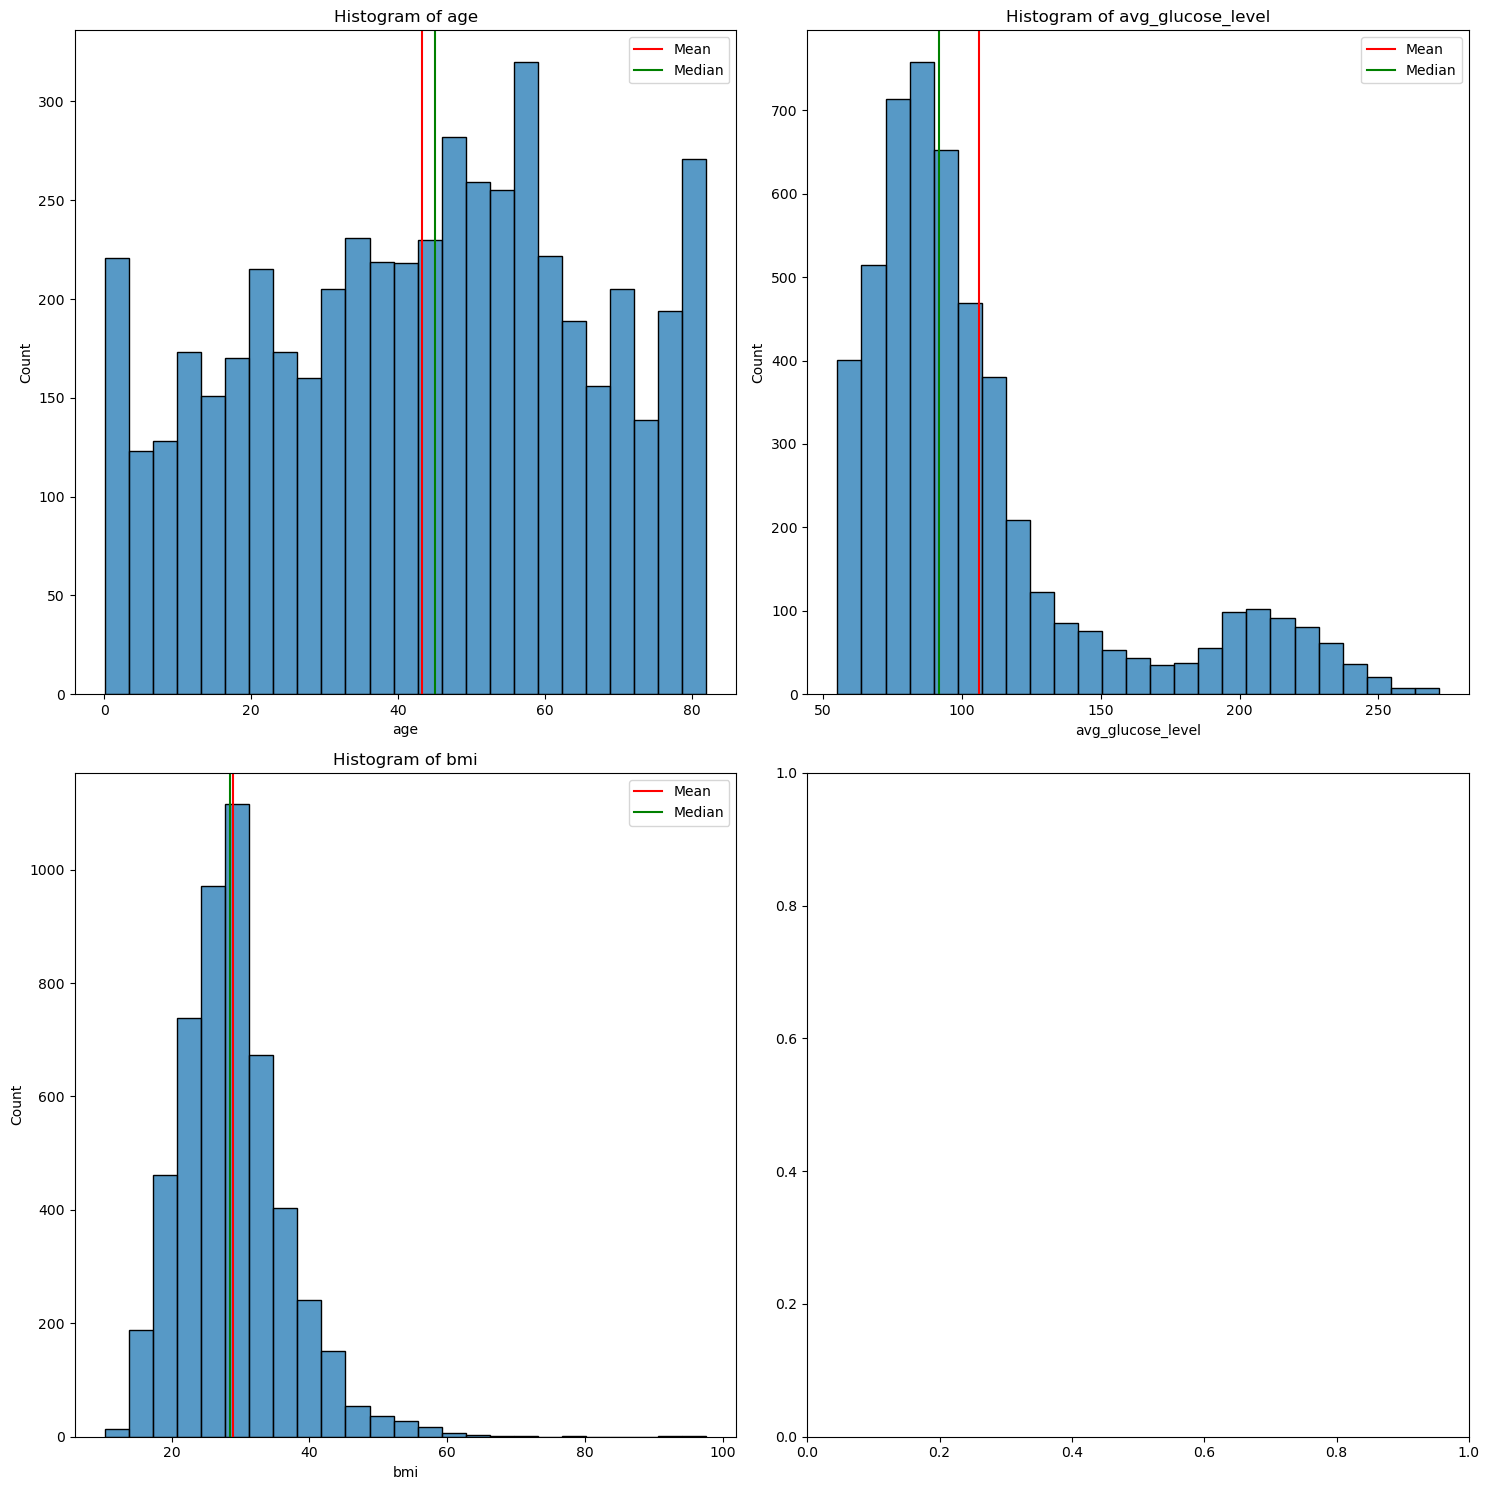

In [32]:
# set up subplots canvas
plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for i, col in enumerate(continuous_value_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], bins=25)
    plt.axvline(df[col].mean(), label='Mean', color='red') # add mean vertical line
    plt.axvline(df[col].median(), label='Median', color='green') # add median vertical line
    plt.title(f'Histogram of {col}')
    plt.legend()
plt.tight_layout()
plt.show()

In [33]:
df['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

Findings:
- BMI has a few outliers where the value in > 60.
- Our target column is `stroke` - the dataset is skewed towards people who did not have a stroke : stroke = 0 for 95% of the dataset. Only 5% has stroke = 1. So we have only 249 rows where stroke = 1, while 4861 rows have stroke = 0.
- Similarly 95% of the dataset does not have heart_disease.
- 90% of the dataset does not have hypertension.
- The dataset has almost an equal number of data from urban and rural areas.
- The dataset has 37% records where the person never smoked, and 33% Unknown, and 32% that smoke currently or previously smoked.
- The dataset has 58% females.
- Work type - 57% of the dataset works in the private sector.

## Bivariate analysis

Let's see if there is a difference in the percentage of stroke for the categorical columns.

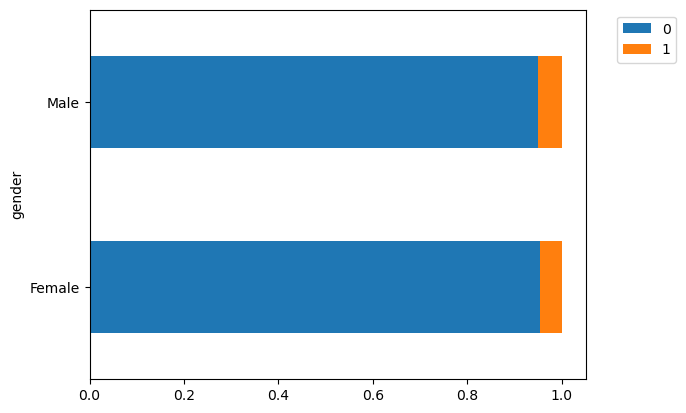

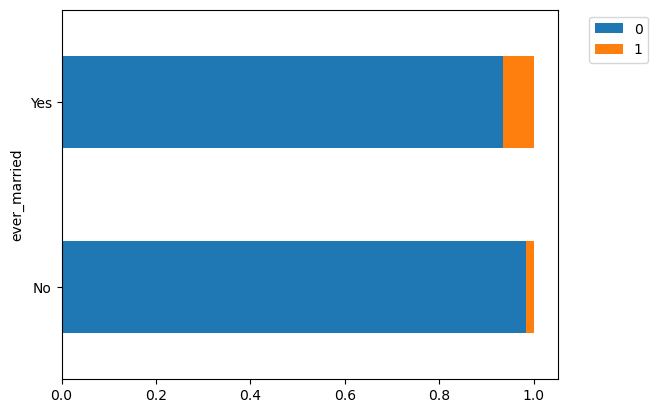

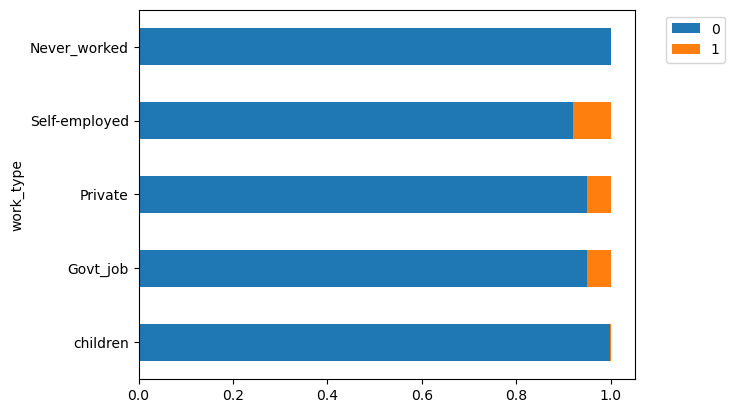

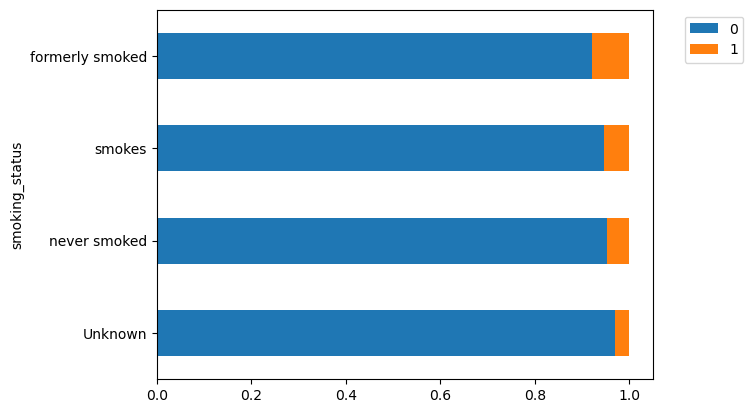

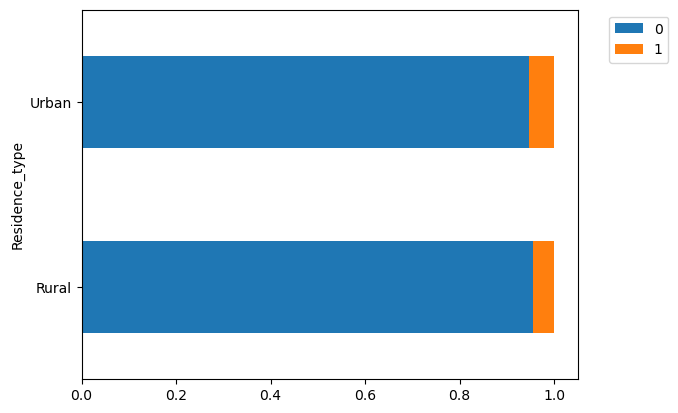

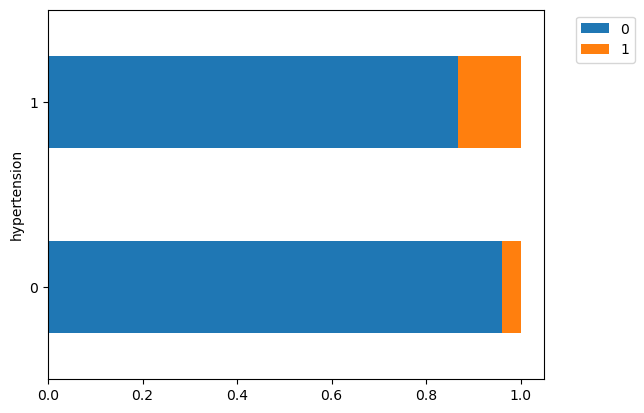

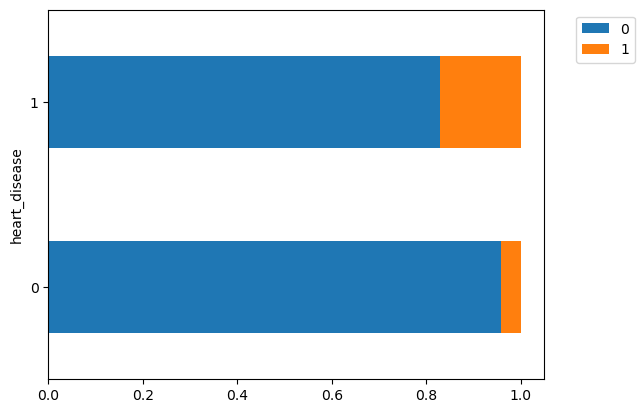

In [34]:
# Iterate over each categorical column except the last (registered)
for column in distinct_value_colums[:-1]:
    pct_registered_df = df.groupby([column, 'stroke'])[column].count()/df.groupby(column)[column].count()
    pct_registered_df.unstack().sort_values(by=1).plot(kind='barh', stacked=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Findings:
- When heart_disease is present then stroke = 1 is more likely
- When hypertension is present then stroke = 1 is more likely
- People who smoked are more likely to have stroke = 1
- self_employed are more likely to have stroke = 1
- ever_married are more likely to have stroke = 1
- Urban vs Rural does not seem to have any direct influence on stroke = 1
- Gender does not seem to have any direct influence on stroke = 1

### Bivariate Analysis - Continuous Columns (Numeric Features)

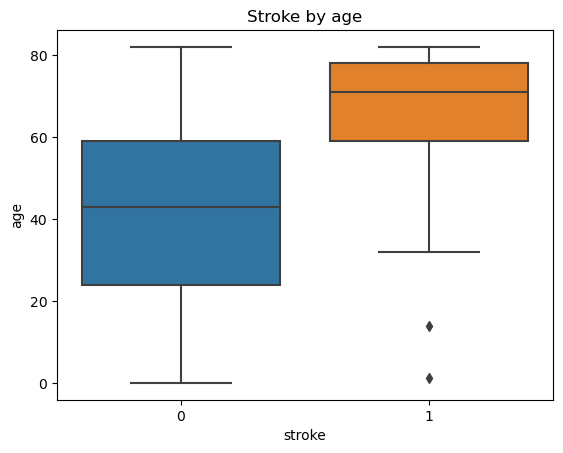

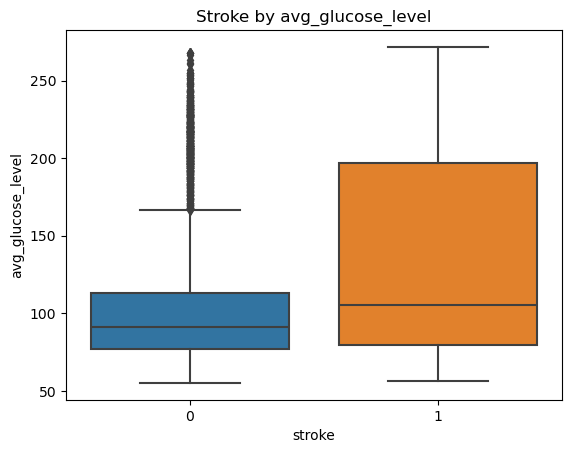

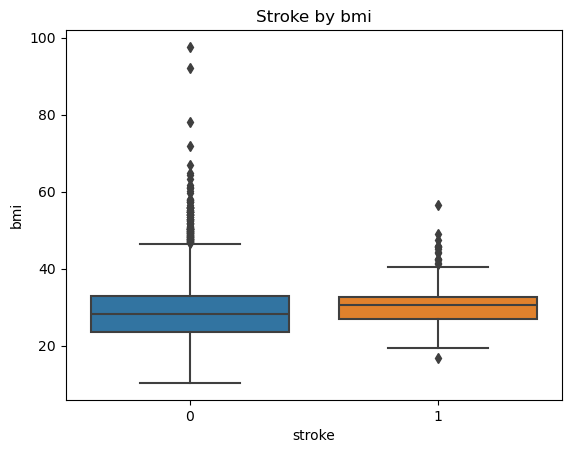

In [35]:
# Converting the registered column to string type so seaborn treats it as a category
for column in continuous_value_columns:
    # Normalize the histogram by passing in 'stat=density' to account for differences in
    # counts by class.
    sns.boxplot(x='stroke', y=column, data=df)
    plt.title(f'Stroke by {column}')
    plt.show()

Findings:
- There does not seem to be an effect of bmi on the likelhood of stroke.
- A higher `avg_glucose_level` seems to be increase the likelihood of stroke.
- Older people (higher `age`) also seems to increase the likelihood of stroke.

Let's save the cleaned dataset

In [36]:
df.to_csv('../data/interim/healthcare-stroke-data-cleaned.csv')